In [33]:
## mounting the google drive

from google.colab import drive
drive.mount('/content/drive')
csv_path='/content/drive/MyDrive/IRMAI/large_log_data.csv'
import pandas as pd
df = pd.read_csv(csv_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df

,Level,Date and Time,Source,Event ID,Task Category
0,Error,2024-12-28 00:55:58,System,4994,Performance
1,Information,2024-12-31 19:43:58,Network,5819,Shutdown
2,Error,2025-01-19 01:47:58,Application,3559,Crash
3,Error,2025-02-06 07:37:58,System,5869,Startup
4,Error,2025-01-24 05:10:58,Application,6651,Startup
...,...,...,...,...,...
9995,Information,2024-12-17 03:32:59,Network,8366,Performance
9996,Warning,2024-12-21 15:06:59,System,5997,Crash
9997,Information,2024-12-11 02:45:59,Security,5783,Audit
9998,Information,2024-12-29 22:53:59,Security,6737,Audit


In [35]:
##importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [36]:
# Display basic info
display(df.head())
print(df.info())
# df=df.reset_index(drop=True)
# df

,Level,Date and Time,Source,Event ID,Task Category
0,Error,2024-12-28 00:55:58,System,4994,Performance
1,Information,2024-12-31 19:43:58,Network,5819,Shutdown
2,Error,2025-01-19 01:47:58,Application,3559,Crash
3,Error,2025-02-06 07:37:58,System,5869,Startup
4,Error,2025-01-24 05:10:58,Application,6651,Startup


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Level          10000 non-null  object
 1   Date and Time  10000 non-null  object
 2   Source         10000 non-null  object
 3   Event ID       10000 non-null  int64 
 4   Task Category  10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB
None


In [37]:
df_column_list=df.columns.tolist()
df_column_list

['Level', 'Date and Time', 'Source', 'Event ID', 'Task Category']

In [38]:
df

,Level,Date and Time,Source,Event ID,Task Category
0,Error,2024-12-28 00:55:58,System,4994,Performance
1,Information,2024-12-31 19:43:58,Network,5819,Shutdown
2,Error,2025-01-19 01:47:58,Application,3559,Crash
3,Error,2025-02-06 07:37:58,System,5869,Startup
4,Error,2025-01-24 05:10:58,Application,6651,Startup
...,...,...,...,...,...
9995,Information,2024-12-17 03:32:59,Network,8366,Performance
9996,Warning,2024-12-21 15:06:59,System,5997,Crash
9997,Information,2024-12-11 02:45:59,Security,5783,Audit
9998,Information,2024-12-29 22:53:59,Security,6737,Audit


<ipython-input-41-afb2408a8b53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.index, y=level_counts.values, palette='viridis')


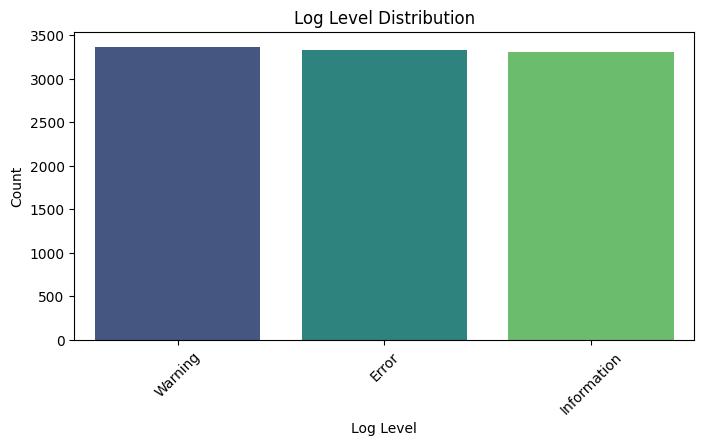

In [41]:
# Count the occurrences of different log levels
if 'Level' in df.columns:
    level_counts = df['Level'].value_counts()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=level_counts.index, y=level_counts.values, palette='viridis')
    plt.xlabel('Log Level')
    plt.ylabel('Count')
    plt.title('Log Level Distribution')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-42-01aa7625de30>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='coolwarm')


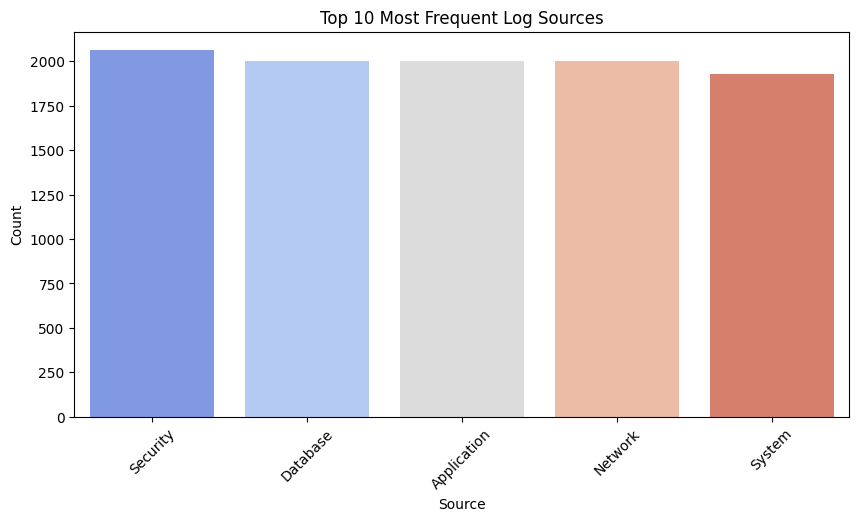

In [42]:
# Identify most frequent sources of logs
if 'Source' in df.columns:
    source_counts = df['Source'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=source_counts.index, y=source_counts.values, palette='coolwarm')
    plt.xlabel('Source')
    plt.ylabel('Count')
    plt.title('Top 10 Most Frequent Log Sources')
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-43-22d5fcee487a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=error_counts.index, y=error_counts.values, palette='magma')


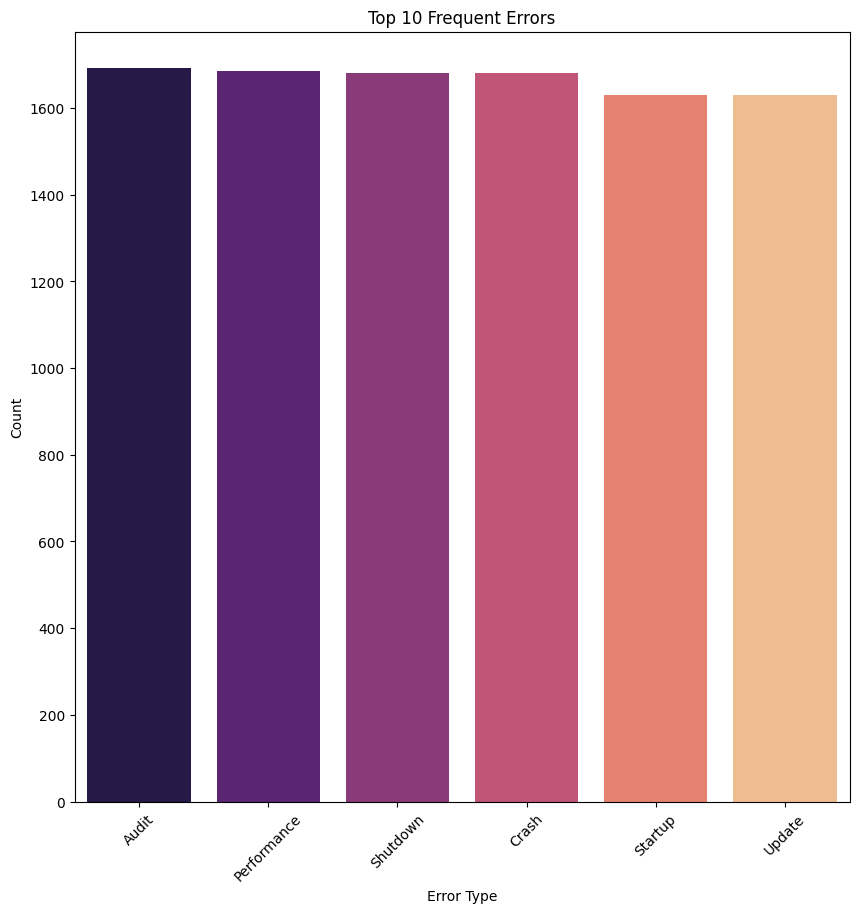

In [43]:

# Find most common errors
if 'Task Category' in df.columns:
    error_counts = df['Task Category'].value_counts().head(10)
    plt.figure(figsize=(10, 10))
    sns.barplot(x=error_counts.index, y=error_counts.values, palette='magma')
    plt.xlabel('Error Type')
    plt.ylabel('Count')
    plt.title('Top 10 Frequent Errors')
    plt.xticks(rotation=45)
    plt.show()

In [44]:
# Detect anomalies: Identify rare event IDs
if 'Event ID' in df.columns:
    event_counts = df['Event ID'].value_counts()
    rare_events = event_counts[event_counts < 5]  # Less than 5 occurrences as anomaly threshold
    print("Rare events (possible anomalies):\n", rare_events)

Rare events (possible anomalies):
 Event ID
9053    4
6681    4
9738    4
7395    4
1721    4
       ..
1874    1
1271    1
5877    1
8384    1
3005    1
Name: count, Length: 5975, dtype: int64


In [45]:
# Extract warnings and errors for deeper analysis
if 'Level' in df.columns:
    warnings_df = df[df['Level'] == 'Warning']
    errors_df = df[df['Level'] == 'Error']
    print(f"Total Warnings: {len(warnings_df)}, Total Errors: {len(errors_df)}")

Total Warnings: 3370, Total Errors: 3325


In [46]:
df['Level_spe']=df['Level'].str.split().str[0]
df

,Level,Date and Time,Source,Event ID,Task Category,Level_spe
0,Error,2024-12-28 00:55:58,System,4994,Performance,Error
1,Information,2024-12-31 19:43:58,Network,5819,Shutdown,Information
2,Error,2025-01-19 01:47:58,Application,3559,Crash,Error
3,Error,2025-02-06 07:37:58,System,5869,Startup,Error
4,Error,2025-01-24 05:10:58,Application,6651,Startup,Error
...,...,...,...,...,...,...
9995,Information,2024-12-17 03:32:59,Network,8366,Performance,Information
9996,Warning,2024-12-21 15:06:59,System,5997,Crash,Warning
9997,Information,2024-12-11 02:45:59,Security,5783,Audit,Information
9998,Information,2024-12-29 22:53:59,Security,6737,Audit,Information
